In [ ]:
## setup analysis
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.purification import purify_pq as ppq; reload(ppq)
from analysis.lib.purification import purify_analysis as pa; reload(pa)
%matplotlib inline

folder_lt3 = r'D:\measuring\data\Purification_lt3_raw_data\Eta_vs_Theta'
folder_lt4 = r'D:\measuring\data\Purification_lt4_raw_data\Eta_vs_Theta'

### ssro calibrations
day = '20160726_' # for ssro calibration
ssro_calib_lt3 = day+'095123'
ssro_calib_lt4 = day+'104600'

Purify_analysis = pa.purify_analysis('Eta_v_Theta',folder_lt3,folder_lt4,ssro_calib_lt3,ssro_calib_lt4)

msmt_days_unshifted = ['20160726']
msmt_days_shifted = ['20160824']

ms0_percents = [10,15,25,35,50,75]
real_theta_vals = np.flipud((0.5-np.array([0.153355,0.2525,0.2827,0.323754,0.362197,0.3865]))
)*np.pi
real_pop_vals = np.sin(real_theta_vals)**2
TPQI_vis = 0.725
TPQI_vis_u = 0.03


In [ ]:
fidelities = []
fidelities_u = []
fidelities_mixed = []
fidelities_mixed_u = []
val00 = []
val11 = []

for ms0_percent in ms0_percents:
    if ms0_percent != 35:
        string = 'eta_'+str(ms0_percent)+'percent'
        st_start = 3055e3#2763e3
    else:
        string = 'ZZ_'+str(ms0_percent)+'percent'
        st_start = 3057e3#2763e3
        
    Purify_analysis.get_tstamps_and_offsets(unshifted_days = msmt_days_unshifted, shifted_days = msmt_days_shifted, contains = string)
    Purify_analysis.load_raw_data()
    
    ##### Set filters:
    st_start = 3055e3#2763e3
    st_len       = 40e3 #50 ns
    st_len_w2    = 40e3
    
    Purify_analysis.apply_temporal_filters_to_prefiltered_data(st_start = st_start,
                                                           st_len = st_len,
                                                           st_len_w2 = st_len_w2
                                                           )
    Purify_analysis.apply_sync_filter_w1_w2()
    corrected_corrs,u_corrected_corrs,no = Purify_analysis.correlate_RO_results_no_purification(apply_ROC = True,return_value = True,verbose=False)
    val00.append(corrected_corrs[3])
    val11.append(corrected_corrs[0])
    fidelities.append((corrected_corrs[1]+corrected_corrs[2] + 2*np.sqrt(TPQI_vis*corrected_corrs[1]*corrected_corrs[2]))/2)
    fidelities_u.append(np.sqrt((1+np.sqrt(TPQI_vis*corrected_corrs[2]/corrected_corrs[1]))*u_corrected_corrs[1]**2\
                               +(1+np.sqrt(TPQI_vis*corrected_corrs[1]/corrected_corrs[2]))*u_corrected_corrs[2]**2\
                               +np.sqrt(corrected_corrs[1]*corrected_corrs[2]/TPQI_vis)*TPQI_vis_u**2)/2)
    
    fidelities_mixed.append((corrected_corrs[1]+corrected_corrs[2])/2)
    fidelities_mixed_u.append(np.sqrt(u_corrected_corrs[1]**2+u_corrected_corrs[2]**2)/2)



In [2]:
## setup analysis
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.purification import purify_pq as ppq; reload(ppq)
from analysis.lib.purification import purify_analysis as pa; reload(pa)
%matplotlib inline

reloaded


In [3]:
ms0_percents = [10,15,25,35,50,75]
real_theta_vals = np.flipud((0.5-np.array([0.153355,0.2525,0.2827,0.323754,0.362197,0.3865]))
)*np.pi
real_pop_vals = np.sin(real_theta_vals)**2
TPQI_vis = 0.725
TPQI_vis_u = 0.03
purified_state_pops = real_pop_vals[1:5]#np.array([15,25,34.5,50])/100.

pur_Fids_m_and_p = np.flipud(np.array([[0.50599, 0.02954, 0.51779, 0.02976],\
                    [0.61099, 0.03484, 0.57424, 0.03461],\
                    [0.65494, 0.03380, 0.65526, 0.03479],\
                    [0.74337, 0.03981, 0.73586, 0.03788]]))

purified_state_fid =  0.5*(pur_Fids_m_and_p[:,0]+pur_Fids_m_and_p[:,2])
purified_state_fid_u =  0.5*np.sqrt(pur_Fids_m_and_p[:,1]**2+pur_Fids_m_and_p[:,3]**2)

model_theta_pur = [0.0244717,0.0954915,0.206107,0.345492,0.5,0.654508,0.793893,0.904508,0.975528,1.]
model_fids_pur = [0.75495,0.751584,0.717445,0.663532,0.589792,0.496099,0.385553,0.268143,0.164567,0.116475]
model_fids_stored = [0.602638,0.602828,0.543042,0.45957,0.364955,0.26963,0.18336,0.114787,0.0707252,0.0555374]
def corrs_theta_theory(theta,pd1,pd2,pdc):
    p11 = 2*np.cos(theta)**4 * pdc
    p00=np.sin(theta)**4 * (pd1*(1-pd2)+pd2*(1-pd1))
    p01=np.sin(theta)**2 * np.cos(theta)**2 * pd2
    p10=np.sin(theta)**2 * np.cos(theta)**2 * pd1
    return np.array([p00,p01,p10,p11])/np.tile((p00+p01+p10+p11)[np.newaxis].T,4).T


pd1 = 8e-4;
pd2 = 4e-4;
pdc = 2.5e-6;
e_state_thetas = np.arange(np.pi/20,np.pi/2+np.pi/21.,np.pi/20) 
e_state_pops = np.sin(e_state_thetas)**2
corrs_e_state = corrs_theta_theory(e_state_thetas,pd1,pd2,pdc)
model_fids_estate = ((corrs_e_state[1]+corrs_e_state[2] + 2*np.sqrt(TPQI_vis*corrs_e_state[1]*corrs_e_state[2]))/2)
model_fids_estate_mixed = ((corrs_e_state[1]+corrs_e_state[2])/2)



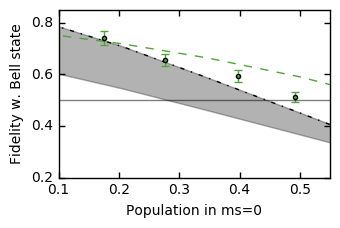

In [7]:
# save_folder = r'K:\ns\qt\Diamond\Projects\Purification\Paper\Plots'
save_folder = r'D:\nkalb\Desktop'
golden_ratio = 1.61803
mm_to_inches = 0.0393701 ### inch/mm
figure_width = mm_to_inches*89
fig = plt.figure(figsize =(figure_width,figure_width/golden_ratio))
ax = plt.subplot(111)

lw = 1
fontsize = 10
markersize = 3
ax.tick_params(labelsize = fontsize,width =lw)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)
ax.yaxis.label.set_size(fontsize)
ax.xaxis.label.set_size(fontsize)


plt.plot([0.0,1.0],[0.5,0.5],'-',color='black',alpha=0.5) # horizontal line for class. fidelity
ax.fill_between(e_state_pops,model_fids_estate,model_fids_stored,color='black',alpha=0.3)
plt.plot(e_state_pops,model_fids_estate,linestyle='-.',color='black',lw=lw)
# plt.plot(e_state_pops,model_fids_estate_mixed,linestyle='--',color='black',lw=lw)
plt.plot(model_theta_pur,model_fids_pur,linestyle='--',color='#50A53A',lw=lw)
# plt.plot(model_theta_pur,model_fids_stored,linestyle='--',color='b')
# plt.errorbar(real_pop_vals,fidelities,fidelities_u,marker='+',ms=10,mew =2,capsize=4, elinewidth=2,ls='none',label = 'Ideal e- state')
# plt.errorbar(real_pop_vals,fidelities_mixed,fidelities_mixed_u,marker='o',ms=markersize,mew =1,capsize=3, elinewidth=lw,ls='none',color='gray',label = 'Accessible e- state')
plt.errorbar(purified_state_pops,purified_state_fid,purified_state_fid_u,marker='o',ms=markersize,mew =1,capsize=3, elinewidth=lw,ls='none', color='#50A53A',label = 'Purified state')


ax.set_ylabel('Fidelity w. Bell state')

# linewidths = lw
# textsize = fontsize

plt.yticks([0.2,0.4,0.6,0.8])
plt.xlim([0.1,0.55])
plt.ylim([0.2,0.85])
# plt.legend( numpoints = 1)

### for the final plot we want to hide the x ticks as they are given in the panel below:
# ax.set_xticklabels([])
ax.set_xlabel('Population in ms=0')

plt.savefig(os.path.join(save_folder,'did_we_purify.png'),
                    format='png',bbox_inches = 'tight',pad_inches=0.3)
plt.savefig(os.path.join(save_folder,'did_we_purify.pdf'),
                    format='pdf',bbox_inches = 'tight',pad_inches=0.3)
plt.show()
plt.close('all')